In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

In [2]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

### 载入IRIS数据集，并进行简单的可视化

In [3]:
iris_data = pd.read_csv("iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


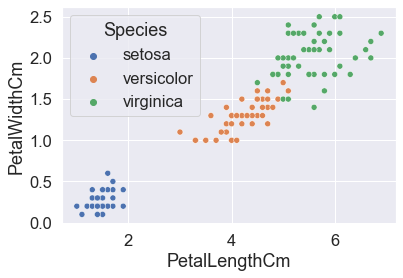

In [4]:
sns.scatterplot(data = iris_data, x = "PetalLengthCm", y="PetalWidthCm", hue="Species");

### 决策树（Decision Tree）分类器

In [5]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["PetalLengthCm", "PetalWidthCm"]], iris_data["Species"])

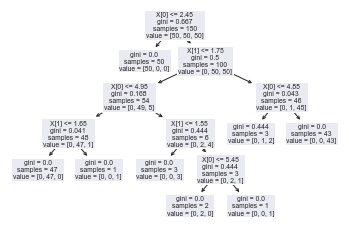

In [6]:
 tree.plot_tree(decision_tree_model);

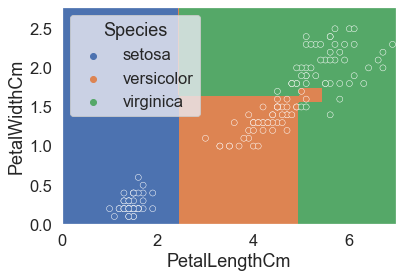

In [7]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "PetalLengthCm", y="PetalWidthCm", hue="Species");

In [8]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(
    iris_data[["PetalLengthCm", "PetalWidthCm"]])
accuracy_score(predictions, iris_data["Species"])

0.9933333333333333

### Overfitting

In [10]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [11]:
train_iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
28,29,5.2,3.4,1.4,0.2,setosa
52,53,6.9,3.1,4.9,1.5,versicolor
140,141,6.7,3.1,5.6,2.4,virginica
114,115,5.8,2.8,5.1,2.4,virginica
3,4,4.6,3.1,1.5,0.2,setosa


In [12]:
test_iris_data = test_iris_data.sort_values(by='Species')
test_iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,setosa
41,42,4.5,2.3,1.3,0.3,setosa
49,50,5.0,3.3,1.4,0.2,setosa
12,13,4.8,3.0,1.4,0.1,setosa
36,37,5.5,3.5,1.3,0.2,setosa


In [13]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_iris_data[["PetalLengthCm", "PetalWidthCm"]], train_iris_data["Species"])

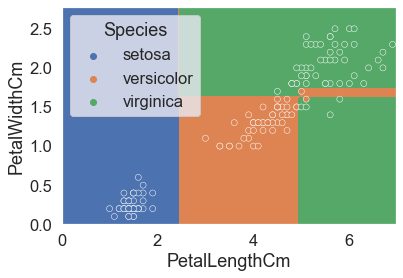

In [14]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "PetalLengthCm", y="PetalWidthCm", hue="Species");

In [15]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(train_iris_data[["PetalLengthCm", "PetalWidthCm"]])
accuracy_score(predictions, train_iris_data["Species"])

0.990909090909091

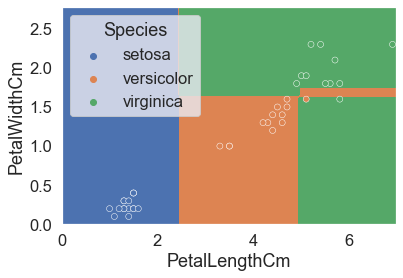

In [16]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])
xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)

Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "PetalLengthCm", y="PetalWidthCm", hue="Species");
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_test_only.png", dpi=300, bbox_inches = "tight")

In [17]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(test_iris_data[["PetalLengthCm", "PetalWidthCm"]])
accuracy_score(predictions, test_iris_data["Species"])

0.975

### 使用Sepal特征，观察更明显的overfitting现象

In [30]:
from sklearn import tree
sepal_decision_tree_model = tree.DecisionTreeClassifier(max_depth=2)
sepal_decision_tree_model = decision_tree_model.fit(train_iris_data[["SepalLengthCm", "SepalWidthCm"]], train_iris_data["Species"])

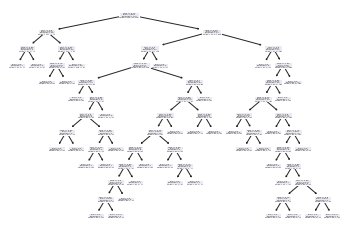

In [31]:
 tree.plot_tree(sepal_decision_tree_model);

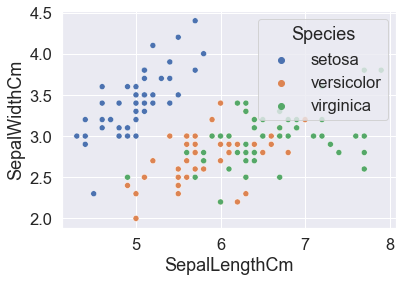

In [32]:
sns.scatterplot(data = iris_data, x = "SepalLengthCm", y="SepalWidthCm", hue="Species", legend=True);

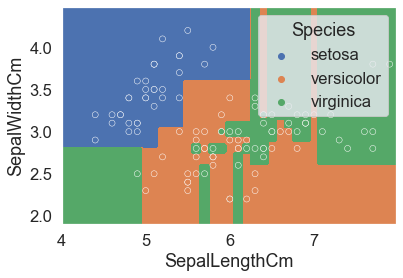

In [33]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "SepalLengthCm", y="SepalWidthCm", hue="Species", legend=True);

In [34]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(train_iris_data[["SepalLengthCm", "SepalWidthCm"]])
accuracy_score(predictions, train_iris_data["Species"])

0.9545454545454546

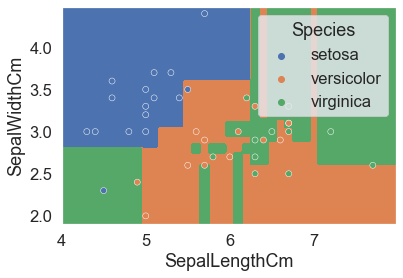

In [35]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "SepalLengthCm", y="SepalWidthCm", hue="Species", legend=True);

In [36]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(test_iris_data[["SepalLengthCm", "SepalWidthCm"]])
accuracy_score(predictions, test_iris_data["Species"])

0.625

### 使用Entropy和Gini构建决策树

In [24]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["PetalLengthCm", "PetalWidthCm"]], iris_data["Species"])

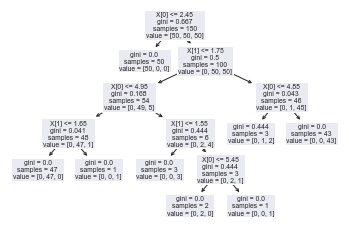

In [25]:
tree.plot_tree(decision_tree_model);

In [26]:
decision_tree_model = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_model = decision_tree_model.fit(iris_data[["PetalLengthCm", "PetalWidthCm"]], iris_data["Species"])

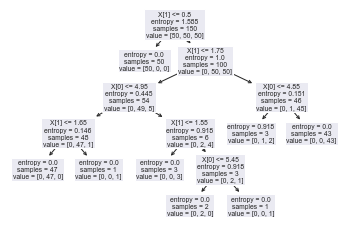

In [27]:
tree.plot_tree(decision_tree_model);

In [26]:
# 信息熵的计算公式
def entropy(x):
    x = [item for item in x if item>0]
    normalized_x = x / np.sum(x)
    return sum(-normalized_x * np.log2(normalized_x))

def weighted_average_entropy(x1, x2):
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    return (N1 * entropy(x1) + N2 * entropy(x2)) / (N1 + N2)

In [27]:
def gini(x):
    normalized_x = x / np.sum(x)
    return 1-sum(normalized_x * normalized_x)

def weighted_average_gini(x1, x2):
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    return (N1 * gini(x1) + N2 * gini(x2)) / (N1 + N2)

In [28]:
gini([50,50]) - weighted_average_gini([49,5],[1,45])

0.38969404186795487

In [29]:
entropy([50,50]) - weighted_average_entropy([49,5],[1,45])

0.6901603707546748

In [31]:
print("Use entropy to partition:")
print("Before: ", entropy([50,50,50]))
print("After: ", weighted_average_entropy([50,0,0],[0,50,50]))

Use entropy to partition:
Before:  1.584962500721156
After:  0.6666666666666666


In [32]:
print("Use gini to partition:")
print("Before: ", gini([50,50,50]))
print("After: ", weighted_average_gini([50,0,0],[0,50,50]))

Use gini to partition:
Before:  0.6666666666666667
After:  0.3333333333333333
